### GPT Evaluation

In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import nltk
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px
import numpy as np


In [3]:
gold_polarity = pd.read_csv('input/gold_standard_corpus/4_annotators/gold_polarities.csv', delimiter=',', encoding='latin-1')
gold_polarity

,question_code,sentence,annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",neutral


In [4]:
gpt_4_simple = pd.read_csv('gpt/gold_polarities_with_sentiment_simple_gpt4_temp02.csv', delimiter=';', encoding='utf-8')

In [5]:
gpt_4_simple

,question_code,sentence,GPT4-simple
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",negative
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",negative


In [6]:
gpt_4_advanced = pd.read_csv('gpt/gold_polarities_with_sentiment_advanced_gpt4_temp02.csv', delimiter=',', encoding='utf-8')

In [7]:
gpt_4_advanced

,question_code,sentence,GPT4-advanced
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",negative
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",positive
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",negative


In [8]:
gpt_4o_simple = pd.read_csv('gpt/gold_polarities_with_sentiment_simple_gpt4o_temp02_v2.csv', encoding='utf-8')

In [9]:
gpt_4o_simple

,question_code,sentence,gpt-4o-simple
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",negative
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",negative
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",negative


In [10]:
gpt_4o_advanced = pd.read_csv('gpt/gold_polarities_with_sentiment_advanced_gpt4o_temp02.csv', delimiter=',', encoding='utf-8')

In [11]:
gpt_4o_advanced

,question_code,sentence,GPT4
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",negative
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,positive
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive
...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",positive
189,G00Q268,aplaude la buena educacion Francesa;,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",positive


In [12]:
merged_df = gpt_4o_advanced.merge(gpt_4_advanced, on=['question_code', 'sentence'], how='inner') \
                           .merge(gpt_4_simple, on=['question_code', 'sentence'], how='inner') \
                           .merge(gpt_4o_simple, on=['question_code', 'sentence'], how='inner') \
                           .merge(gold_polarity, on=['question_code', 'sentence'], how='inner')

# Display the merged dataframe
merged_df


,question_code,sentence,GPT4,GPT4-advanced,GPT4-simple,gpt-4o-simple,annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",negative,negative,negative,negative,negative
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",negative,neutral,neutral,neutral,neutral
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,positive,negative,negative,negative,negative
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",neutral,negative,negative,negative,neutral
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,negative,negative,negative,negative,negative
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",positive,positive,negative,negative,negative
189,G00Q268,aplaude la buena educacion Francesa;,positive,positive,positive,positive,positive
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",positive,negative,negative,negative,neutral


In [13]:
merged_df['GPT4-advanced'].value_counts()

GPT4-advanced
negative    114
positive     45
neutral      29
unknown       4
Name: count, dtype: int64

In [14]:
merged_df['GPT4'].value_counts()

GPT4
negative    93
positive    60
neutral     35
unknown      4
Name: count, dtype: int64

In [15]:
merged_df['GPT4-simple'].value_counts()

GPT4-simple
negative    113
positive     40
neutral      39
Name: count, dtype: int64

In [16]:
merged_df['gpt-4o-simple'].value_counts()

gpt-4o-simple
negative    113
positive     40
neutral      39
Name: count, dtype: int64

In [17]:
merged_df.replace({'positive': 1, 'neutral': 2, 'negative': 3, 'unknown': 4}, inplace=True)


In [18]:
merged_df

,question_code,sentence,GPT4,GPT4-advanced,GPT4-simple,gpt-4o-simple,annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",3,3,3,3,3
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",3,2,2,2,2
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,1,3,3,3,3
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",2,3,3,3,2
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",1,1,1,1,1
...,...,...,...,...,...,...,...
187,G00Q265,Nos quexamos continuamente de que nuestros dia...,3,3,3,3,3
188,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",1,1,3,3,3
189,G00Q268,aplaude la buena educacion Francesa;,1,1,1,1,1
190,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",1,3,3,3,2


In [19]:
merged_df.columns

Index(['question_code', 'sentence', 'GPT4', 'GPT4-advanced', 'GPT4-simple',
       'gpt-4o-simple', 'annotation'],
      dtype='object')

In [20]:
GPT4o_advanced_list = merged_df['GPT4'].astype(str).tolist()
GPT4_advanced_list = merged_df['GPT4-advanced'].astype(str).tolist()
GPT4_simple_list = merged_df['GPT4-simple'].astype(str).tolist()
annotation_list = merged_df['annotation'].astype(str).tolist()


In [21]:
gpt_4o_simple_list = merged_df['gpt-4o-simple'].astype(str).tolist()
gpt_4o_simple_list

['3',
 '2',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '1',
 '2',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '1',
 '1',
 '3',
 '2',
 '3',
 '1',
 '2',
 '3',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '2',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '2',
 '3',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '1',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '2',
 '3',
 '2',
 '1',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '2',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '2',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2'

In [22]:
GPT4_advanced_list

['3',
 '2',
 '3',
 '3',
 '1',
 '1',
 '3',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '3',
 '1',
 '2',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '4',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '1',
 '1',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '1',
 '3',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '1',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '2',
 '3',
 '3',
 '3',
 '2',
 '4',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '2',
 '3',
 '3',
 '1',
 '3',
 '2',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '1'

In [23]:
annotation_list

['3',
 '2',
 '3',
 '2',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '1',
 '1',
 '2',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '1',
 '3',
 '1',
 '3',
 '1',
 '1',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '1',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '1',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '1',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '2',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2'

In [24]:
accuracy_score(annotation_list,GPT4o_advanced_list)

0.6354166666666666

In [25]:
print(classification_report(annotation_list,GPT4o_advanced_list))

              precision    recall  f1-score   support

           1       0.53      0.71      0.61        45
           2       0.31      0.34      0.33        32
           3       0.85      0.69      0.76       115
           4       0.00      0.00      0.00         0

    accuracy                           0.64       192
   macro avg       0.42      0.44      0.42       192
weighted avg       0.69      0.64      0.65       192



C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
accuracy_score(annotation_list,GPT4_simple_list)

0.8229166666666666

In [59]:
pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/65.9 MB 1.7 MB/s eta 0:00:40
   ---------------------------------------- 0.6/65.9 MB 7.7 MB/s eta 0:00:09
    --------------------------------------- 1.6/65.9 MB 13.0 MB/s eta 0:00:05
   - -------------------------------------- 3.1/65.9 MB 18.2 MB/s eta 0:00:04
   - -------------------------------------- 3.1/65.9 MB 18.2 MB/s eta 0:00:04
   - -------------------------------------- 3.1/65.9 MB 18.2 MB/s eta 0:00:04
   --- ------------------------------------ 5.4/65.9 MB 17.2 MB/s eta 0:00:04
   ---- ----------------------------------- 8.2/65.9 MB 22.9 MB/s eta 0:00:03
   ------ --------------------------------- 10.4/65.9 MB 28.5 MB/s eta 0:00:02
   ------- -------------------------------- 12.6/65.9 MB 32.7 MB/s eta 0:00:02
   --------- ------------------------------ 14.9/65.9 MB 50.4 MB/s eta 0:00:02
   ---------- ----------------------------- 17.0/65.9 MB 46.7 MB/s eta 

In [27]:
print(classification_report(annotation_list,GPT4_simple_list))

              precision    recall  f1-score   support

           1       0.90      0.80      0.85        45
           2       0.51      0.62      0.56        32
           3       0.90      0.89      0.89       115

    accuracy                           0.82       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.84      0.82      0.83       192



In [28]:
accuracy_score(annotation_list,gpt_4o_simple_list)

0.8229166666666666

In [29]:
print(classification_report(annotation_list,gpt_4o_simple_list))

              precision    recall  f1-score   support

           1       0.90      0.80      0.85        45
           2       0.51      0.62      0.56        32
           3       0.90      0.89      0.89       115

    accuracy                           0.82       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.84      0.82      0.83       192



In [30]:
accuracy_score(annotation_list,GPT4_advanced_list)

0.78125

In [31]:
print(classification_report(annotation_list,GPT4_advanced_list))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76        45
           2       0.48      0.44      0.46        32
           3       0.89      0.89      0.89       115
           4       0.00      0.00      0.00         0

    accuracy                           0.78       192
   macro avg       0.53      0.52      0.53       192
weighted avg       0.79      0.78      0.79       192



C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
cm_gpt4o_advanced = confusion_matrix(annotation_list,GPT4o_advanced_list)

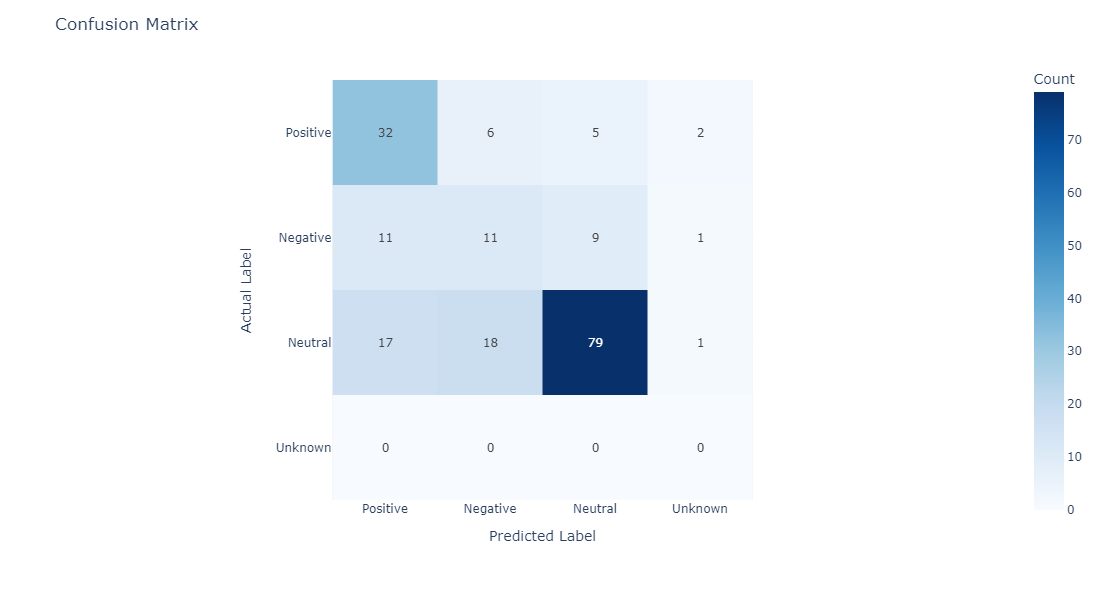

In [63]:
labels = ['Positive', 'Negative', 'Neutral', 'Unknown']

# Create the heatmap with Plotly
fig = px.imshow(cm_gpt4o_advanced, 
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,  # Automatically place annotations
                color_continuous_scale='Blues')

# Update layout
fig.update_layout(title='Confusion Matrix', width=600, height=600)
fig.show()


In [48]:
cm_gpt4_advanced = confusion_matrix(annotation_list,GPT4_advanced_list)

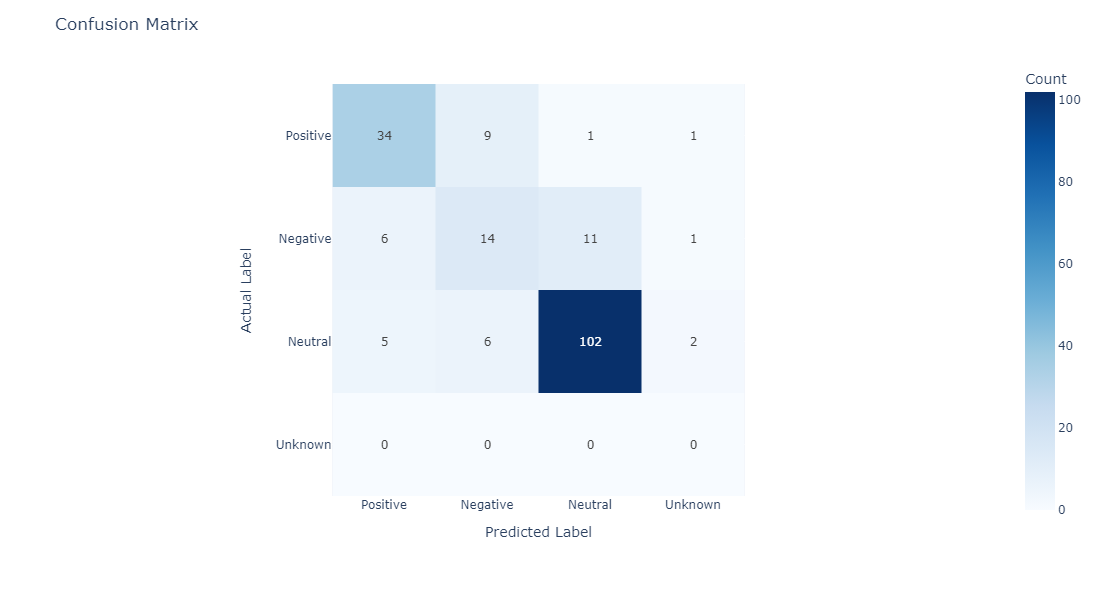

In [49]:
labels = ['Positive', 'Negative', 'Neutral', 'Unknown']

# Create the heatmap with Plotly
fig = px.imshow(cm_gpt4_advanced, 
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,  # Automatically place annotations
                color_continuous_scale='Blues')

# Update layout
fig.update_layout(title='Confusion Matrix', width=600, height=600)
fig.show()


In [60]:
cm_gpt4o_simple = confusion_matrix(annotation_list,gpt_4o_simple_list)

In [61]:
cm_gpt4o_simple

array([[ 36,   7,   2],
       [  3,  20,   9],
       [  1,  12, 102]], dtype=int64)

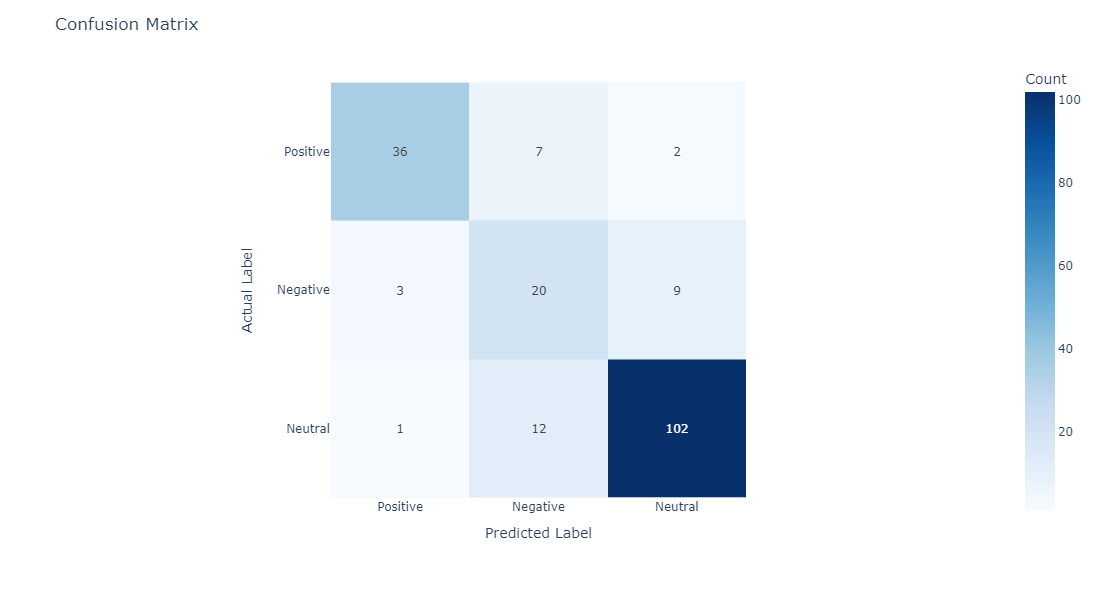

In [62]:
labels = ['Positive', 'Negative', 'Neutral']

# Create the heatmap with Plotly
fig = px.imshow(cm_gpt4o_simple, 
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,  # Automatically place annotations
                color_continuous_scale='Blues')

# Update layout
fig.update_layout(title='Confusion Matrix', width=600, height=600)
fig.show()


In [57]:
cm_GPT4_simple_list = confusion_matrix(annotation_list,GPT4_simple_list)

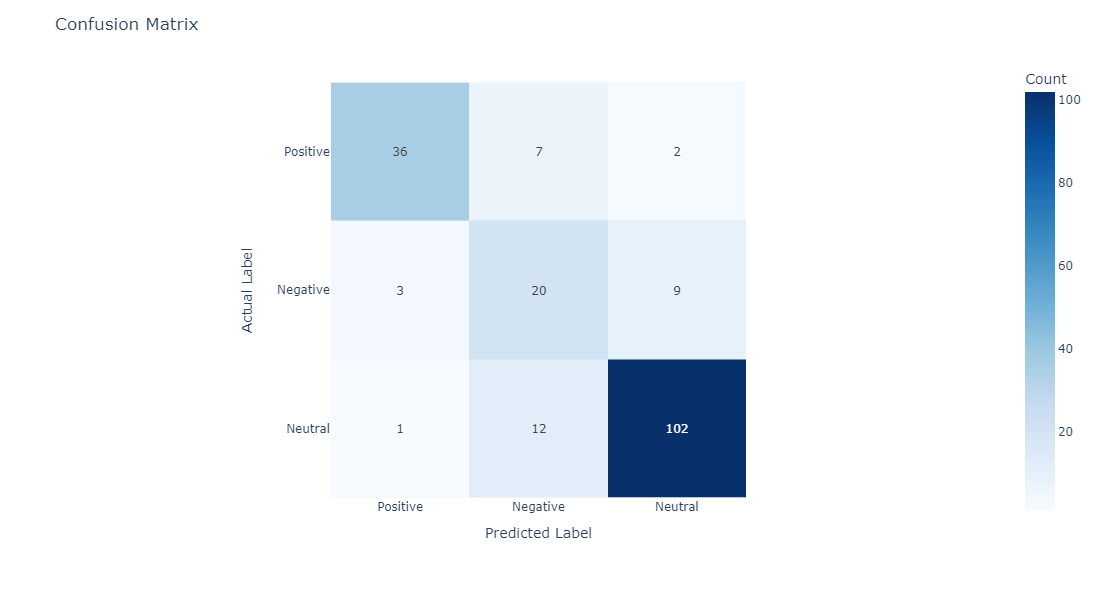

In [58]:
labels = ['Positive', 'Negative', 'Neutral']

# Create the heatmap with Plotly
fig = px.imshow(cm_GPT4_simple_list , 
                labels=dict(x="Predicted Label", y="Actual Label", color="Count"), 
                x=labels, 
                y=labels,
                text_auto=True,  # Automatically place annotations
                color_continuous_scale='Blues')

# Update layout
fig.update_layout(title='Confusion Matrix', width=600, height=600)
fig.show()
